# ESR Frequency tracker

In [1]:
from iqtools import *
import numpy as np
from pylab import psd
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
#filename = '/Users/shahab/Documents/Work_Directories/git/iq_suite/238UFrag-2014.10.16.22.59.27.383.tiq'
#filename = '/Users/shahab/test/p400332/acq_data.tiq'

#filename = 'RSA51-2014.10.02.01.01.58.385.TIQ'
#filename = 'RSA52-2014.10.02.01.01.58.801.TIQ'

#filename = 'RSA51-2014.10.03.01.01.19.636.TIQ'
#filename = 'RSA52-2014.10.03.01.01.17.427.TIQ'

#filename = 'RSA51-2014.10.04.01.01.44.986.TIQ'
#filename = 'RSA52-2014.10.04.01.01.40.074.TIQ'

#filename = 'RSA51-2014.10.05.01.01.49.204.TIQ'
#filename = 'RSA52-2014.10.05.01.01.43.362.TIQ'

#filename = 'RSA51-2014.10.06.01.01.34.099.TIQ'
#filename = 'RSA52-2014.10.06.01.01.27.251.TIQ'

#filename = 'RSA51-2014.10.07.01.02.00.990.TIQ'
#filename = 'RSA52-2014.10.07.01.01.52.933.TIQ'

#filename = 'RSA51-2014.10.08.01.02.13.675.TIQ'
#filename = 'RSA52-2014.10.08.01.02.04.636.TIQ'

#filename = 'RSA51-2014.10.09.01.01.14.674.TIQ'
#filename = 'RSA52-2014.10.09.01.01.04.719.TIQ'

#filename = 'RSA51-2014.10.10.01.02.12.037.TIQ'
#filename = 'RSA52-2014.10.10.01.02.01.179.TIQ'

#filename = 'RSA51-2014.10.11.01.01.36.372.TIQ'
#filename = 'RSA52-2014.10.11.01.01.15.063.TIQ'

filename = 'RSA51-2014.10.12.01.01.57.831.TIQ'
#filename = 'RSA52-2014.10.12.01.01.35.284.TIQ'

iq_data= IQData()
_,_ = iq_data.read_tiq(filename, 120, 1024, 357)
#_,_ = iq_data.read_tiq(filename, 120, 1024, 1550)
x1 = iq_data.data_array
fs1 = iq_data.fs
center1 = iq_data.center
span1 = iq_data.span
f, p = get_pwelch(x1, fs1)

-977.516174316 244912022.484 -84.8470269378


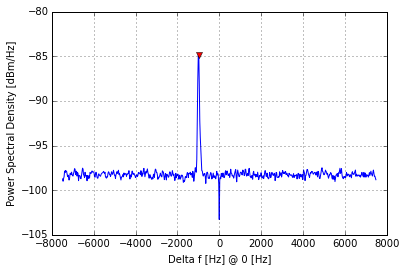

In [34]:
f_peak, p_peak = get_broad_peak_dbm(f, p)
print(f_peak[0], center1+f_peak[0], p_peak[0])
plot_dbm_per_hz(f, p, 0, span1)
plt.plot(f_peak, p_peak, 'rv')
#f3db, p3db = get_fwhm(F, P)
#plt.plot(f3db, p3db, 'gx')

In [35]:
f_centred = shift_to_center(f, center1)
f_centred[p.argmax()]

244912022.48382568

In [36]:
f_centred_masked, p_masked = zoom_in_freq(f_centred, p, center=244913095.367, span=1400)

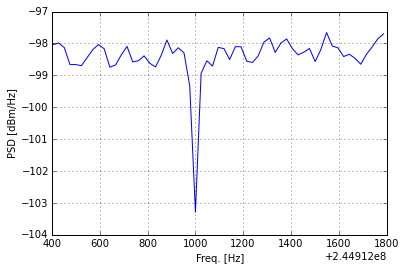

In [37]:
plt.plot(f_centred_masked, get_dbm(p_masked));plt.grid(1);plt.xlabel('Freq. [Hz]');plt.ylabel('PSD [dBm/Hz]')

In [53]:
f_centred_masked[p_masked.argmax()] - f_centred[p.argmax()]

0.0